In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from sklearn.cluster import KMeans

In [17]:
demand_seasonality_data = pd.read_csv('demand_seasonalities.csv')
metro_areas_data = pd.read_csv('msa.csv')
demand_pmf_by_zip_data = pd.read_csv('zip3_pmf.csv')
price_to_ship_in_zip_data = pd.read_csv('order_shipment_matrix.csv')
zip_coordinates_data = pd.read_csv('zip3_coordinates.csv')

In [19]:
price_to_ship_in_zip_data['minimum_distance'] = np.array([0,51,151,301,601,1001,1401,1801])
price_to_ship_in_zip_data['maximum_distance'] = np.array([50, 150,300,600,1000,1400,1800, 50000])
price_to_ship_in_zip_data['Zone'] = [z[0] for z in price_to_ship_in_zip_data['Zone'].astype('str')]
price_to_ship_in_zip_data

,Zone,Cost ($) per product unit,minimum_distance,maximum_distance
0,1,13.29,0,50
1,2,15.09,51,150
2,3,19.05,151,300
3,4,24.15,301,600
4,5,28.73,601,1000
5,6,34.00,1001,1400
6,7,36.17,1401,1800
7,8,38.81,1801,50000


The growth in USA is projected to be median = 7.5%, min = 4% and max = 12%

In [23]:
df_coords_to_geo = gpd.GeoDataFrame(zip_coordinates_data, geometry= gpd.points_from_xy(zip_coordinates_data.Lon, zip_coordinates_data.Lat))
df_coords_to_geo

,ZIP3,Lat,Lon,geometry
0,10,42.221598,-72.573558,POINT (-72.57356 42.22160)
1,11,42.105773,-72.583739,POINT (-72.58374 42.10577)
2,12,42.396595,-73.237576,POINT (-73.23758 42.39659)
3,13,42.578956,-72.540044,POINT (-72.54004 42.57896)
4,14,42.566233,-71.696724,POINT (-71.69672 42.56623)
...,...,...,...,...
887,995,60.970213,-151.140110,POINT (-151.14011 60.97021)
888,996,60.524385,-153.405946,POINT (-153.40595 60.52438)
889,997,65.359648,-151.894015,POINT (-151.89402 65.35965)
890,998,58.188334,-135.227811,POINT (-135.22781 58.18833)


Next, we get the map of the USA

In [31]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Atharva Ketkar\AppData\Local\Temp\ipykernel_95040\4068596486.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<Axes: >

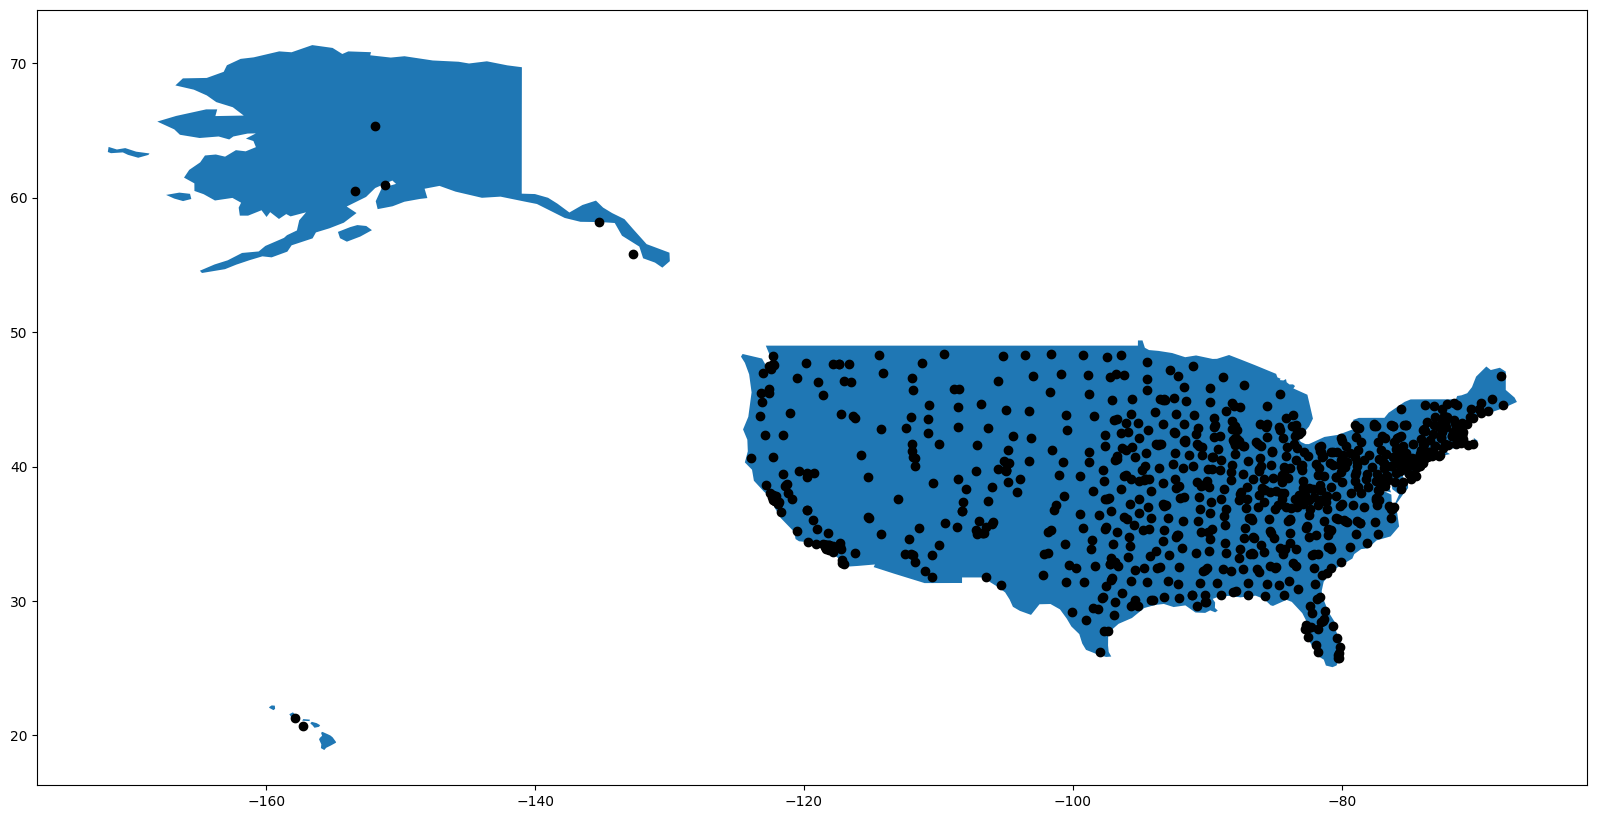

In [32]:
axis = world_data[world_data.iso_a3 == 'USA'].plot(figsize = (20,20))
df_coords_to_geo.plot(ax=axis, color = 'black')

There are 4 FCs, 